# COSMEE Data Analysis
1. Import Data
    1. csv from Athena
    2. dataframe in python

2. 가공
    1. column 정리
    2. update
    3. 결합
        1. author + tag, author + activity
        2. author + user
        3. activity + user
        4. tag + 1, tag + 2
    4. 검증
        1. Data 개수
        2. 논리적 오류(ex. posting user의 demo 정보는 필수)

3. 분석
    1. 태그 선택
        1. 단어 그대로
        2. 포함

    2. output 속성, 결과값 선택
        1. survey answer
        2. output 수치
        3. 시각화

In [72]:
import os # listdir (get filelist)
import pandas as pd
import ast # to convert a string to dict
import csv

# 1. Import Data

## 1.2. 모든 데이터 dataframe으로 저장

In [73]:
# file list
dir_data = 'C:/Users/dongm/COSMOCHAIN/Data/COSMEE/Pilot/'
dir_output = 'C:/Users/dongm/COSMOCHAIN/Data/'
filelist =os.listdir(dir_data)
display(filelist)

['comments.csv',
 'comments_update.csv',
 'downvote.csv',
 'posts.csv',
 'posts_tags.csv',
 'recomments.csv',
 'recomments_update.csv',
 'sort.csv',
 'user.csv',
 'users_update.csv',
 'vote.csv']

In [74]:
# csv to dataframe
def csv2df(mydir,inp):
    print(inp,'reading')
    try:
        data = pd.read_csv(mydir+inp, encoding='UTF-8')
    except:
        data = pd.read_csv(mydir+inp, encoding='cp949')
    return data


In [75]:
# dataframe 저장
def saveAllFile(filelist):
    data={}
    for i in range(len(filelist)):
        inputfilename= filelist[i]
        if inputfilename[-3:] != 'csv':
            continue
        df = csv2df(dir_data,inputfilename)
        data[inputfilename]=df
        
    return data

In [76]:
# 파일 dataframe에 저장    
dic_data = saveAllFile(filelist)

comments.csv reading
comments_update.csv reading
downvote.csv reading
posts.csv reading
posts_tags.csv reading
recomments.csv reading
recomments_update.csv reading
sort.csv reading
user.csv reading
users_update.csv reading
vote.csv reading


# 2. 가공

## 2.1. column 정리

### Survey Answer : Pivot Table (by question id, answer)

In [77]:
# survey answer 파일 경로
dir_survey = 'C:/Users/dongm/COSMOCHAIN/Data/COSMEE/정리/'
inp = 'survey.xlsx'


In [78]:
survey_answers = pd.read_excel(dir_survey + inp,sheet_name=3)
print('설문조사에 참여한 사람 :',len(set(survey_answers['userid'])),'명')

survey_answers = survey_answers.sort_values(by=['userid','questionid'])
survey_answers = survey_answers.pivot('userid','questionid','answer')


설문조사에 참여한 사람 : 2192 명


### tag sorting

In [79]:
sortoftag = dic_data['sort.csv']
sortoftag.head()

,태그,횟수,분류
0,코스미,7874,기타
1,보습,3453,기능
2,향수,2803,카테고리별
3,메이크업,2241,메이크업
4,립스틱,2104,카테고리별


### User : basicskininfo 쪼개고, age는 현재 기준

In [80]:
def setUser(user):
    age = []
    gender   = []
    skinTone = []
    skinType = []
    skinConcern1 = []
    skinConcern2 = []
    skinConcern3 = []

    for i in range(len(user)):
        # 나이, 성별

        try:
            userAge = 2020 - int(ast.literal_eval(user['profileproperties'][i])['birthday'][:4])
            userGender = ast.literal_eval(user['profileproperties'][i])['gender']
        except:
            userAge = 0
            userGender = '#'

        # skinTone, skinType, skinConcerns
        try:
            userSkinTone = ast.literal_eval(user['basicskininfo'][i])['skinTone']
            userSkinType = ast.literal_eval(user['basicskininfo'][i])['skinType']
            userSkinConcerns = ast.literal_eval(user['basicskininfo'][i])['skinConcerns']
        except:
            userSkinTone = '#'
            userSkinType = '#'
            userSkinConcerns = ['#','#','#']


        while len(userSkinConcerns) < 3:
            userSkinConcerns.append('#')

        age.append(userAge)
        gender.append(userGender)
        skinTone.append(userSkinTone)
        skinType.append(userSkinType)
        skinConcern1.append(userSkinConcerns[0])
        skinConcern2.append(userSkinConcerns[1])
        skinConcern3.append(userSkinConcerns[2])
        
    # column 추가
    user['age']         = age
    user['gender']      = gender
    user['skinTone']    = skinTone
    user['skinType']    = skinType
    user['skinConcern1']= skinConcern1
    user['skinConcern2']= skinConcern2
    user['skinConcern3']= skinConcern3
    user = user.drop(columns=['basicskininfo','profileproperties'])
    
    return user

### user : 최초 가입 시

In [81]:
user = dic_data['user.csv']
user = setUser(user)

user = user.sort_values(by='userid', ascending=False)
user = user.reset_index(drop=True)

# user = user.set_index('userid')

### users_update : 가입후 정보변경

In [82]:
users_update = dic_data['users_update.csv']
users_update = setUser(users_update)

users_update = users_update.sort_values(by=['userid','age','skinConcern1'], ascending=False)

users_update = users_update.drop_duplicates(subset='userid')

users_update = users_update.reset_index(drop=True)

## 2.2. update data

In [83]:
'''
def applyUpdate(df1, df2):
    cnt=0
    print('전체 데이터 개수 :',len(df1))
    for i in range(len(df1)):
        if df1['userid'][i]==df2['userid'][cnt]:
            df1.iloc[i]=df2.iloc[cnt]
            cnt+=1
            
        if i%1000 == 0:
            print('df1 row =', i,'df2 row =',cnt)
    return df1

user = applyUpdate(user, users_update)
user.head()
'''

print('시간이 너무 오래걸려서 고민 필요!')


시간이 너무 오래걸려서 고민 필요!


In [186]:
# user.to_csv(dir_output+'users_final.csv')
user_total = pd.read_csv(dir_output+'users_final.csv', encoding='UTF-8')
user_total['skinConcerns'] = '"'+user_total['skinConcern1'] +'","'+ user_total['skinConcern2'] + '","' +user_total['skinConcern3']+'"'
user_total = user_total.drop(columns=['Unnamed: 0','skinConcern1','skinConcern2','skinConcern3'])

In [187]:
user_total

,userid,age,gender,skinTone,skinType,skinConcerns
0,ffffe04b-cc6d-42ed-bdff-d34c1f681145,28,FEMALE,MIDDLE,COMBINATION,"""WHITENING"",""BLACKHEAD"",""DRY"""
1,fffc943d-2465-448e-8d4b-b6ad5ae94891,35,FEMALE,BRIGHT,COMBINATION,"""DRY"",""#"",""#"""
2,fff85d68-d364-4f0e-a541-6a26c9486b32,0,#,#,#,"""#"",""#"",""#"""
3,fff720a5-ae75-4095-9a41-1a775187cc0d,0,#,#,#,"""#"",""#"",""#"""
4,fff67ffa-4926-4859-b879-fd7f4166b396,31,FEMALE,MIDDLE,DRY,"""BLACKHEAD"",""WHITENING"",""WRINKLE"""
5,fff41575-80d6-417d-b541-d01d8302c09b,30,MALE,MIDDLE,DRY,"""SENSITIVE"",""#"",""#"""
6,fff3ef8f-4471-4788-afb9-7f8bb8236e88,39,FEMALE,BRIGHT,COMBINATION,"""WRINKLE"",""#"",""#"""
7,fff36287-782c-4281-8127-8e863413f087,0,#,#,#,"""#"",""#"",""#"""
8,fff31d50-201a-4643-87f3-139eb76b39c4,30,FEMALE,MIDDLE,DRY,"""WRINKLE"",""SENSITIVE"",""DRY"""
9,fff2c8b2-c961-4681-8ee4-2b28cebcaa21,0,#,#,#,"""#"",""#"",""#"""


In [188]:
def change_skinConcerns(user):
    skinConcerns_list=[]
    for skinConcerns in user['skinConcerns']:
        while skinConcerns[-3:]=='"#"':
            if len(skinConcerns)<4:
                break
            skinConcerns = skinConcerns[:-4]
        skinConcerns_list.append('['+skinConcerns+']')    
    user['skinConcerns'] = skinConcerns_list
    return user


In [189]:
user_total = change_skinConcerns(user_total)

In [190]:
# user_total['skinConcerns'] = skinConcerns_list
user_total

,userid,age,gender,skinTone,skinType,skinConcerns
0,ffffe04b-cc6d-42ed-bdff-d34c1f681145,28,FEMALE,MIDDLE,COMBINATION,"[""WHITENING"",""BLACKHEAD"",""DRY""]"
1,fffc943d-2465-448e-8d4b-b6ad5ae94891,35,FEMALE,BRIGHT,COMBINATION,"[""DRY""]"
2,fff85d68-d364-4f0e-a541-6a26c9486b32,0,#,#,#,"[""#""]"
3,fff720a5-ae75-4095-9a41-1a775187cc0d,0,#,#,#,"[""#""]"
4,fff67ffa-4926-4859-b879-fd7f4166b396,31,FEMALE,MIDDLE,DRY,"[""BLACKHEAD"",""WHITENING"",""WRINKLE""]"
5,fff41575-80d6-417d-b541-d01d8302c09b,30,MALE,MIDDLE,DRY,"[""SENSITIVE""]"
6,fff3ef8f-4471-4788-afb9-7f8bb8236e88,39,FEMALE,BRIGHT,COMBINATION,"[""WRINKLE""]"
7,fff36287-782c-4281-8127-8e863413f087,0,#,#,#,"[""#""]"
8,fff31d50-201a-4643-87f3-139eb76b39c4,30,FEMALE,MIDDLE,DRY,"[""WRINKLE"",""SENSITIVE"",""DRY""]"
9,fff2c8b2-c961-4681-8ee4-2b28cebcaa21,0,#,#,#,"[""#""]"


## 2.3 결합

### 2.3.1 tag + posts, comments, recomments, votes, downvotes

In [165]:
def tags_activity(activity):
    caller = dic_data[activity]
    other  = dic_data['posts_tags.csv']
    try:
        tags_activity = caller.set_index('postid').join(other.set_index('postid'))
    except:
        tags_activity = caller.set_index('targetid').join(other.set_index('postid'))
        tags_activity.index.name = 'postid'

    tags_activity = tags_activity.reset_index()
    tags_activity = tags_activity.drop_duplicates()
    tags_activity = tags_activity.dropna(subset=['name'])
    
    print(activity,'join complete!')
    return tags_activity

In [166]:
'''
tags_recomments = tags_activity('recomments.csv')
tags_comments = tags_activity('comments.csv')
tags_downvote = tags_activity('downvote.csv')
tags_vote = tags_activity('vote.csv')
'''
tags_posts = tags_activity('posts.csv')

posts.csv join complete!


In [167]:
len(tags_posts)

250423

In [168]:
caller  = tags_posts
other = user_total

user_posts = caller.set_index('authorid').join(other.set_index('userid'))
user_posts.head()

,postid,name,age,gender,skinTone,skinType,skinConcerns
00073951-eb12-4a0f-94a4-b432fe3c821d,439a0baa-b7cb-439a-8de6-98ce2dc51d34,립스틱,0,#,#,#,"[""#""]"
00073951-eb12-4a0f-94a4-b432fe3c821d,439a0baa-b7cb-439a-8de6-98ce2dc51d34,좋아요,0,#,#,#,"[""#""]"
00073951-eb12-4a0f-94a4-b432fe3c821d,439a0baa-b7cb-439a-8de6-98ce2dc51d34,맞추,0,#,#,#,"[""#""]"
00073951-eb12-4a0f-94a4-b432fe3c821d,439a0baa-b7cb-439a-8de6-98ce2dc51d34,맞팔,0,#,#,#,"[""#""]"
00073951-eb12-4a0f-94a4-b432fe3c821d,439a0baa-b7cb-439a-8de6-98ce2dc51d34,갑니당,0,#,#,#,"[""#""]"


In [169]:
user_posts.index.name = 'userid'
user_posts = user_posts.reset_index()
print('전체 tag 개수 :',len(user_posts))

전체 tag 개수 : 250423


In [170]:
postUserSurvey = user_posts.join(survey_answers,on='userid')
postUserSurvey = postUserSurvey.sort_values(by='userid')
postUserSurvey = postUserSurvey.reset_index(drop=True)
# del dic_data

In [171]:
tt = postUserSurvey['skinConcerns'][70]
# postUserSurvey['7-2-0'][70]
tt

'["BLACKHEAD","ACNE","SENSITIVE"]'

# 3.분석

In [172]:
from collections import Counter
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

## 3.1. 태그 선택

In [173]:
def getTagSummary(postUserSurvey, brand=False):
    if brand:
        TF=[]
        for i in range(len(postUserSurvey)):
            my_tag = postUserSurvey['name'][i]
            if my_tag[:len(brand)]==brand:
                TF.append(True)
            else:
                TF.append(False)
        postUserSurvey=postUserSurvey.iloc[TF,:]
    
    
#    postUserSurvey = postUserSurvey.drop(columns='skinConcerns')
    
    # 해당 브랜드 관련 posting 한 user의 중복 제거!!
    postUserSurvey = postUserSurvey.drop_duplicates(subset='userid')
    postUserSurvey = postUserSurvey.drop(columns=['userid','postid','name'])
    # 여기서 원하는 속성 선택하는거야!
    # 어떤 속성??
    
    # sort int,str impossible <<<<<<<<<<<< ???
    mybrand = postUserSurvey.apply(pd.value_counts)
    return mybrand

In [174]:
def dequote(string):
    if len(string)<=1:
        return string
    if string[0] in ['"',"'"]:
        string = string[1:]
    if string[-1] in ['"',"'"]:
        string = string[:-1]
    return string

In [175]:
def skingender_result(mydata, col):
    result_dic = {}
    labels = mydata.index
    sizes = mydata
    for i, label in enumerate(labels):
        result_dic[label] = sizes[i]
        
    return result_dic


In [176]:
def survey_result(mydata, col):
    labels=[]
    for n, index in enumerate(mydata.index):
        index = index[1:-1]
        index = index.split('","') * int( mydata[n] )
        for item in index:
            item = dequote(item)
            labels.append(item)
    counter = Counter(labels)
    return dict(counter.most_common())


In [177]:
def age_result(mydata, col):
    result_dic = {}
    bins = range(max(mydata.index)+1)
    cnt=0
    for b in bins:
        if mydata.index[cnt]==b:
            result_dic[b]=mydata.iloc[cnt]
            cnt+=1
        else:
            result_dic[b]=0
    
    age_range = 5
    result_keys = []
    result_values = [0] * (len(result_dic) // age_range + 1)
    for i, value in enumerate(result_dic.values()):
        if i % age_range==0:
            result_keys.append('%d - %d' % (i,i+age_range-1))
        result_values[i//age_range]+=value



    result_dic = {}
    for i in range(len(result_values)):
        result_dic[result_keys[i]]=result_values[i]


    return result_dic


In [178]:
def ignoreSmall(result, mydata):
    larger = {}
    smaller= {'기타':0}
    for key,value in result.items():
        if value < sum(result.values()) * max(0.02, 1/int(sum(mydata))):
            smaller['기타'] += value
        else:
            larger[key] = value
    result=larger
    if smaller['기타']>0:
        result.update(smaller)
        
        
    return result

In [179]:
def result_brand(brand, brandname, topN = 10):
    for col in brand.columns:
        mydata = brand[col]
        mydata = mydata.dropna()
        mydata = mydata.sort_index()

        # 성별
        if col=='age':
            result = age_result(mydata, col)
            result = ignoreSmall(result, mydata)
            
            fig, ax1 = plt.subplots()
#            ax1.bar(result.keys(), result.values())
            ax1.pie(result.values(), labels=result.keys(), autopct='%1.1f%%',
                    shadow=True, startangle=90)
            ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

        # skinTone, Type, Gender
        elif col in ['skinTone','skinType','gender']:
            result = skingender_result(mydata, col)
            
            fig, ax1 = plt.subplots()
            ax1.pie(result.values(), labels=result.keys(), autopct='%1.1f%%',
                    shadow=True, startangle=90)
            ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
            
        # skinConcerns
        elif col =='skinConcerns':
            result = survey_result(mydata, col)
#            del result['#']
            fig, ax1 = plt.subplots()
            
            ax1.pie(result.values(), labels = result.keys(), autopct='%1.1f%%',
                    shadow=True, startangle=90, labeldistance=1.05)
            ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
            
        
        # survey
        else:
            result = survey_result(mydata, col)
            result = ignoreSmall(result, mydata)
            
            fig, ax1 = plt.subplots()
            
            ax1.pie(result.values(), labels = result.keys(), autopct='%1.1f%%',
                    shadow=True, startangle=90, labeldistance=1.05)
            ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
                    
                
                
        plt.title((brandname+' '+col).upper())
        
        print('-*'*15)
        print('ASK =>', col)
        print('유저 수 =>', int(sum(mydata)))
        print('답변 수(중복포함) =>',int(sum(result.values())))
        
        # See Top 5 result
        topNresult = dict(Counter(result).most_common(5))
        for key, value in topNresult.items():
            topNresult[key] = '%0.1f' % float(value / sum(result.values())*100)
        print('Top %d =>' % min(5, len(result)), topNresult)
        
            
        while False:
            plt.savefig(dir_output+brandname+col+'.png')
            with open(brandname+'.csv', 'a') as f:  # Just use 'w' mode in 3.x
                w = csv.writer(f)
                w.writerow(result.keys())
                w.writerow(result.values())
        plt.show()

### 전체 태그

In [180]:
total_tag = getTagSummary(postUserSurvey)

C:\Users\dongm\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:107: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)
C:\Users\dongm\Anaconda3\lib\site-packages\pandas\core\frame.py:7397: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  index = _union_indexes(indexes)
C:\Users\dongm\Anaconda3\lib\site-packages\pandas\core\frame.py:7397: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  index = _union_indexes(indexes)


-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => age
유저 수 => 4967
답변 수(중복포함) => 4967
Top 5 => {'15 - 19': '24.7', '30 - 34': '20.9', '25 - 29': '16.8', '20 - 24': '13.4', '35 - 39': '9.5'}


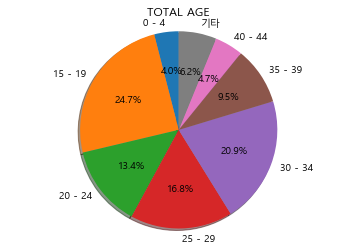

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => gender
유저 수 => 4967
답변 수(중복포함) => 4967
Top 3 => {'FEMALE': '71.8', 'MALE': '24.3', '#': '3.9'}


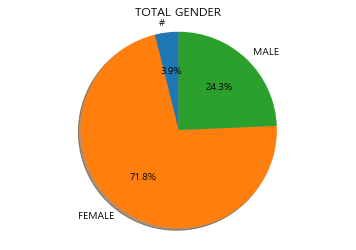

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => skinTone
유저 수 => 4967
답변 수(중복포함) => 4967
Top 4 => {'MIDDLE': '53.9', 'BRIGHT': '28.5', 'DARK': '13.8', '#': '3.9'}


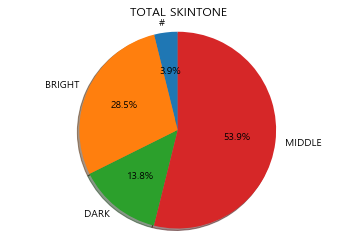

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => skinType
유저 수 => 4967
답변 수(중복포함) => 4967
Top 5 => {'COMBINATION': '36.0', 'DRY': '26.9', 'OILY': '17.6', 'NORMAL': '15.7', '#': '3.9'}


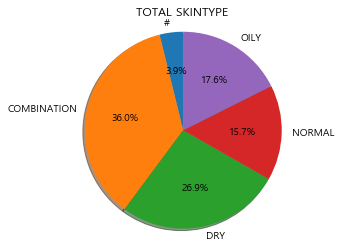

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => skinConcerns
유저 수 => 4967
답변 수(중복포함) => 11888
Top 5 => {'BLACKHEAD': '22.5', 'DRY': '18.5', 'ACNE': '16.9', 'WHITENING': '14.7', 'SENSITIVE': '13.9'}


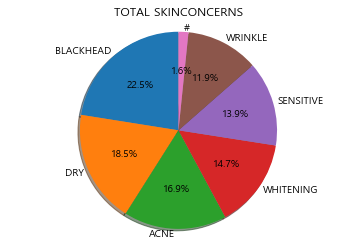

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 1-1-0
유저 수 => 1389
답변 수(중복포함) => 1389
Top 2 => {'여자': '60.0', '남자': '40.0'}


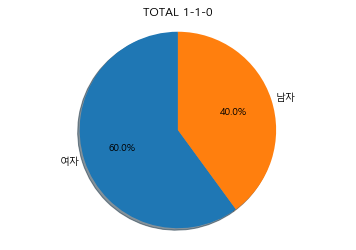

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 1-2-0
유저 수 => 1389
답변 수(중복포함) => 1389
Top 1 => {'기타': '100.0'}


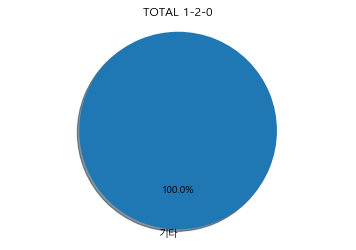

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 1-3-0
유저 수 => 1389
답변 수(중복포함) => 2778
Top 5 => {'기타': '55.2', '서울특별시': '14.4', '경기도': '10.2', '부산광역시': '3.9', '경상남도': '3.5'}


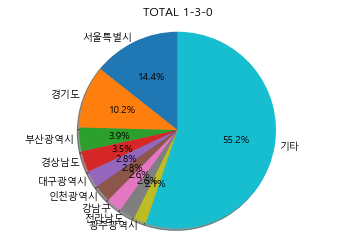

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 10-1-0
유저 수 => 649
답변 수(중복포함) => 649
Top 3 => {'둘 다 이용함': '44.4', '온라인': '33.3', '오프라인': '22.3'}


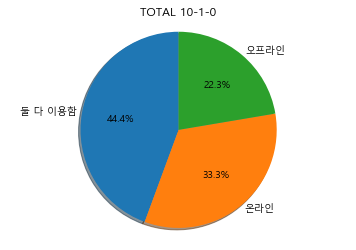

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 10-2-A
유저 수 => 216
답변 수(중복포함) => 216
Top 5 => {'기타': '50.5', '올리브영': '8.8', '11번가': '8.3', '옥션': '5.1', '쿠팡': '4.6'}


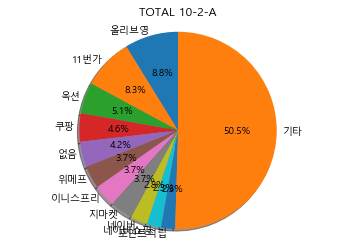

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 10-2-B
유저 수 => 145
답변 수(중복포함) => 145
Top 5 => {'올리브영': '38.6', '기타': '33.1', '이니스프리': '10.3', '아리따움': '8.3', '백화점': '4.8'}


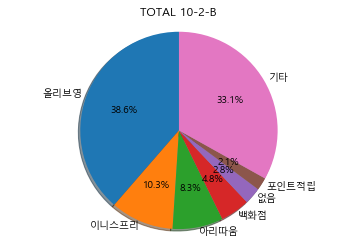

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 10-2-C
유저 수 => 288
답변 수(중복포함) => 288
Top 2 => {'온라인': '50.3', '오프라인': '49.7'}


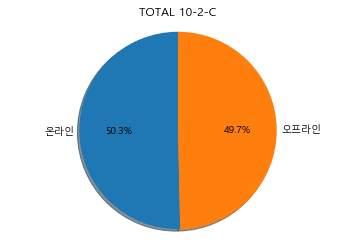

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 10-3-A
유저 수 => 216
답변 수(중복포함) => 216
Top 4 => {'가격이 더 싸서': '66.2', '매장에 가기 귀찮아서': '26.4', '온라인에서만 파는 제품이라서': '5.1', '기타': '2.3'}


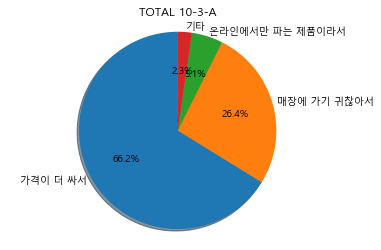

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 10-3-B
유저 수 => 145
답변 수(중복포함) => 145
Top 4 => {'직접 제품을 체험해 보기 위해': '71.7', '기다리기 싫어서': '19.3', '온라인은 가품일 수 있어서': '6.2', '기타': '2.8'}


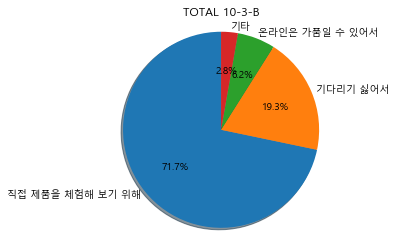

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 10-3-C
유저 수 => 288
답변 수(중복포함) => 288
Top 5 => {'기타': '59.4', '올리브영': '23.6', '이니스프리': '5.9', '토니모리': '3.5', '11번가': '3.1'}


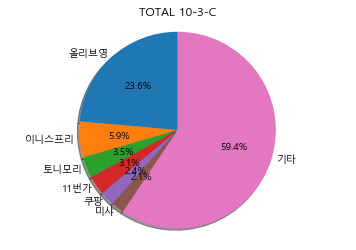

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 11-1-0
유저 수 => 601
답변 수(중복포함) => 601
Top 3 => {'둘 다 이용함': '41.1', '오프라인': '30.4', '온라인': '28.5'}


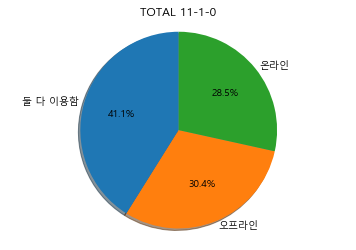

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 11-2-A
유저 수 => 171
답변 수(중복포함) => 171
Top 5 => {'기타': '48.0', '11번가': '11.7', '올리브영': '10.5', '옥션': '5.8', '없음': '4.7'}


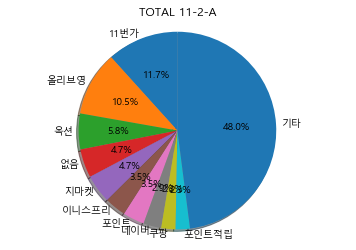

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 11-2-B
유저 수 => 183
답변 수(중복포함) => 183
Top 5 => {'기타': '35.5', '올리브영': '31.1', '이니스프리': '8.7', '아리따움': '8.2', '더페이스샵': '4.4'}


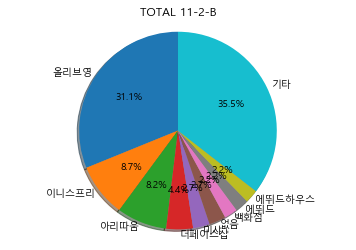

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 11-2-C
유저 수 => 247
답변 수(중복포함) => 247
Top 2 => {'오프라인': '62.3', '온라인': '37.7'}


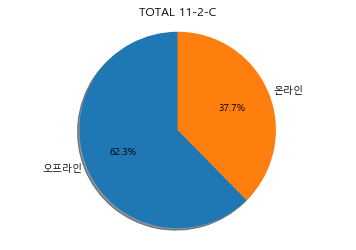

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 11-3-A
유저 수 => 171
답변 수(중복포함) => 171
Top 5 => {'가격이 더 싸서': '71.9', '매장에 가기 귀찮아서': '19.9', '매장에는 재고가 없기 때문에': '2.9', '온라인에서만 파는 제품이라서': '2.9', '기타': '2.3'}


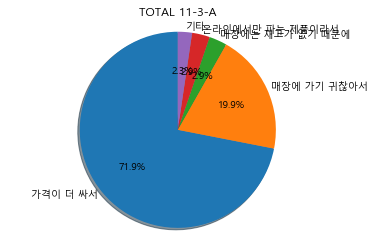

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 11-3-B
유저 수 => 183
답변 수(중복포함) => 183
Top 4 => {'직접 제품을 체험해 보기 위해': '85.8', '기다리기 싫어서': '8.2', '온라인은 가품일 수 있어서': '3.3', '기타': '2.7'}


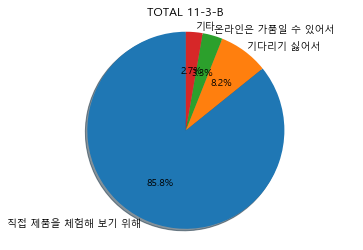

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 11-3-C
유저 수 => 247
답변 수(중복포함) => 247
Top 5 => {'기타': '57.9', '올리브영': '23.5', '아리따움': '4.5', '미샤': '3.6', '에뛰드하우스': '3.2'}


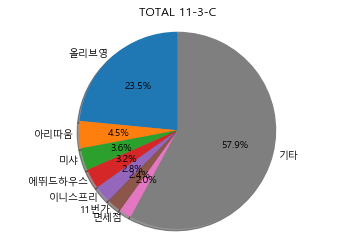

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 2-1-0
유저 수 => 1112
답변 수(중복포함) => 1112
Top 5 => {'복합성': '33.4', '건성': '31.5', '지성': '21.0', '중성': '10.3', '잘 모르겠음': '3.9'}


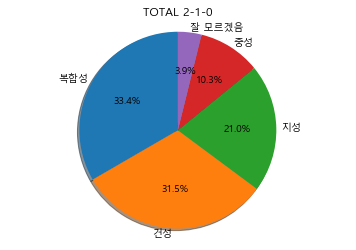

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 2-2-0
유저 수 => 1112
답변 수(중복포함) => 1112
Top 4 => {'중간 톤': '52.9', '밝은 톤': '29.5', '어두운 톤': '16.3', '기타': '1.3'}


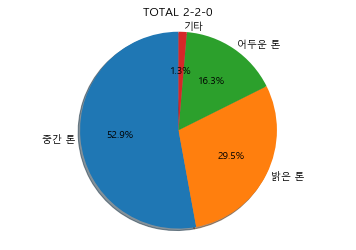

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 2-3-0
유저 수 => 1112
답변 수(중복포함) => 2513
Top 5 => {'건조': '20.1', '주름/탄력': '19.5', '블랙헤드/피지': '19.0', '여드름': '14.0', '미백': '13.7'}


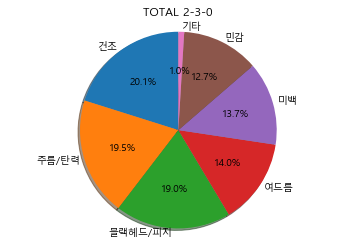

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 3-1-0
유저 수 => 1027
답변 수(중복포함) => 2222
Top 5 => {'SNS (인스타그램/블로그 등)': '29.7', 'TV': '20.9', '비디오 플랫폼 (유튜브 등)': '18.9', '온라인 쇼핑': '14.5', '커뮤니티': '13.4'}


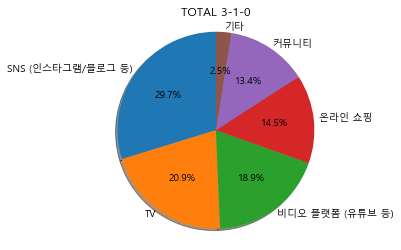

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 3-2-A
유저 수 => 322
답변 수(중복포함) => 322
Top 5 => {'TVN': '28.6', 'JTBC': '26.1', 'MBC': '16.8', 'SBS': '15.2', 'KBS': '8.4'}


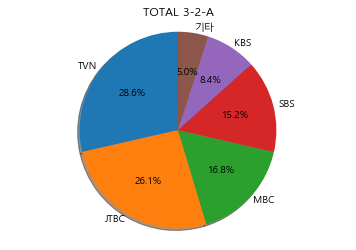

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 3-2-B
유저 수 => 412
답변 수(중복포함) => 769
Top 5 => {'인스타그램': '40.7', '페이스북': '28.6', '블로그': '22.6', '트위터': '6.1', '기타': '2.0'}


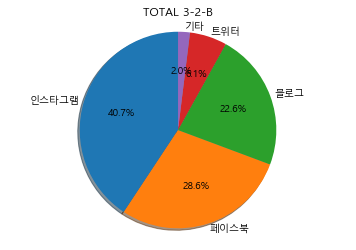

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 3-2-C
유저 수 => 134
답변 수(중복포함) => 213
Top 5 => {'유튜브': '59.2', '네이버 TV': '18.3', '아프리카': '11.3', '카카오 TV': '8.9', '기타': '2.3'}


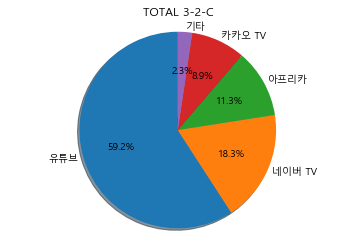

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 3-2-D
유저 수 => 73
답변 수(중복포함) => 128
Top 5 => {'네이트 판': '24.2', '파우더룸': '17.2', '여성시대': '14.1', '기타': '13.3', '쭉방카페': '7.0'}


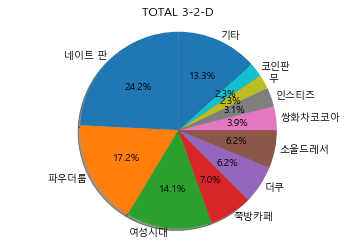

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 3-2-E
유저 수 => 71
답변 수(중복포함) => 150
Top 5 => {'오픈마켓(G마켓, 11번가, 쿠팡 )': '33.3', '네이버 쇼핑': '30.7', '종합 쇼핑몰(신세계몰, CJmall 등)': '18.0', '브랜드 공식 홈페이지': '9.3', '드럭스토어(올리브영 등)': '8.7'}


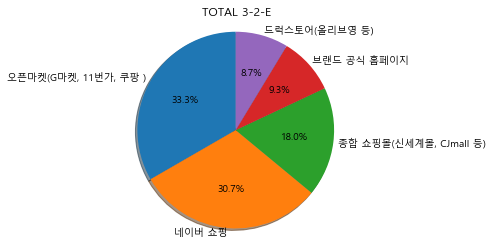

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 3-2-F
유저 수 => 15
답변 수(중복포함) => 15
Top 5 => {'Sns': '6.7', '가상화페 투자': '6.7', '독서 하면서 보내요 여행도 하고 외국어 공부를 취미 생활로 하면서 일상을 보냅니다~^^': '6.7', '라디오 들으면서 일상 생활하기': '6.7', '명상': '6.7'}


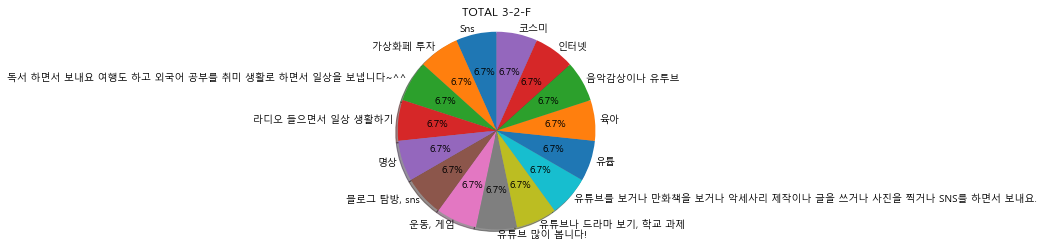

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 3-3-0
유저 수 => 1027
답변 수(중복포함) => 1027
Top 5 => {'SNS': '32.2', '화장품 리뷰 앱': '19.5', '포털사이트': '14.1', '커뮤니티': '10.3', '지인': '9.0'}


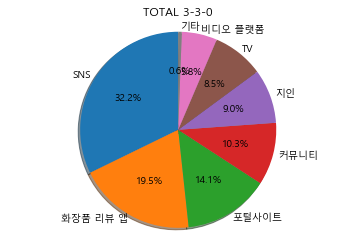

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 4-1-0
유저 수 => 943
답변 수(중복포함) => 943
Top 5 => {'포털사이트': '29.6', 'SNS': '22.4', '화장품 리뷰 앱': '20.3', '쇼핑몰 후기': '12.6', '커뮤니티': '7.6'}


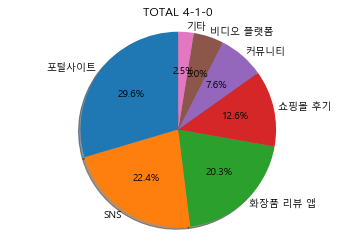

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 4-2-A
유저 수 => 279
답변 수(중복포함) => 279
Top 4 => {'네이버': '87.1', '다음': '7.5', '구글': '3.2', '기타': '2.2'}


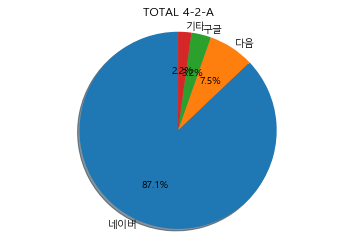

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 4-2-B
유저 수 => 47
답변 수(중복포함) => 47
Top 4 => {'유튜브': '72.3', '카카오 TV': '17.0', '네이버 TV': '8.5', '티비': '2.1'}


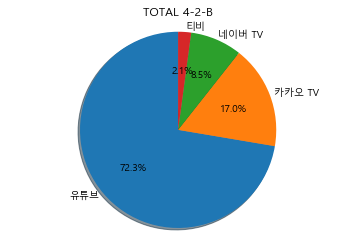

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 4-2-C
유저 수 => 211
답변 수(중복포함) => 211
Top 5 => {'인스타그램': '39.8', '블로그': '28.4', '페이스북': '21.3', '트위터': '7.1', '기타': '3.3'}


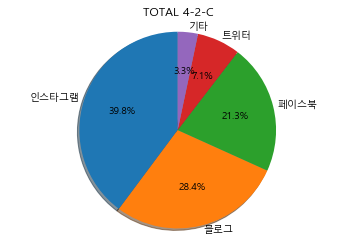

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 4-2-D
유저 수 => 191
답변 수(중복포함) => 191
Top 5 => {'화해': '60.7', '글로우픽': '13.6', '파우더룸': '13.1', '언니의파우치': '8.9', '코스미': '2.6'}


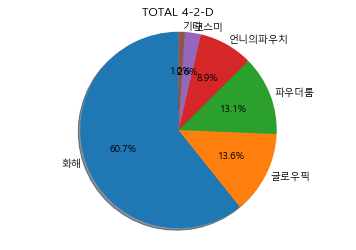

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 4-2-E
유저 수 => 72
답변 수(중복포함) => 72
Top 5 => {'파우더룸': '23.6', '네이트 판': '22.2', '여성시대': '18.1', '기타': '9.7', '인스티즈': '6.9'}


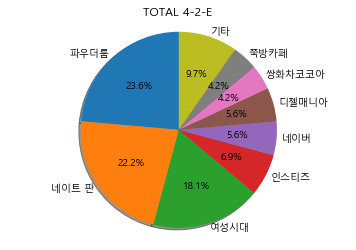

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 4-2-F
유저 수 => 119
답변 수(중복포함) => 119
Top 5 => {'오픈마켓(G마켓, 11번가, 쿠팡)': '37.0', '네이버 쇼핑': '32.8', '브랜드 공식 홈페이지': '16.8', '종합 쇼핑몰(신세계몰,CJmall 등)': '8.4', '드럭스토어(올리브영 등)': '3.4'}


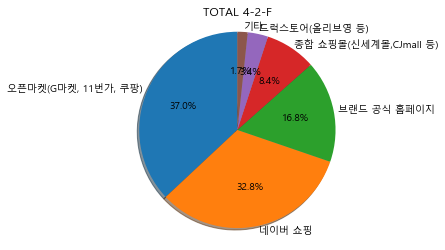

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 4-2-G
유저 수 => 24
답변 수(중복포함) => 24
Top 5 => {'네이버': '12.5', '유투브': '8.3', 'Sns': '4.2', 'sbs': '4.2', '따로 없어요': '4.2'}


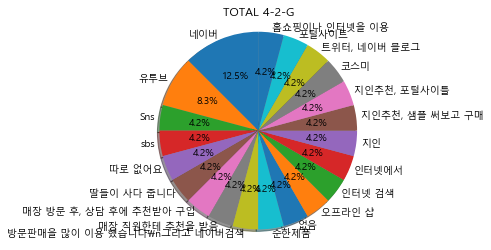

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 4-3-A
유저 수 => 279
답변 수(중복포함) => 279
Top 5 => {'블로그/카페 후기': '71.3', '공식 홈페이지': '16.1', '쇼핑몰': '5.0', '기사': '4.7', '이미지': '2.9'}


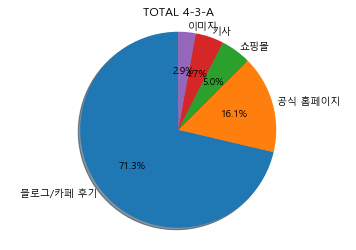

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 4-3-B
유저 수 => 47
답변 수(중복포함) => 47
Top 5 => {'조회수가 많은 콘텐츠': '34.0', '제목과 설명에 내가 찾는 내용이 있는 콘텐츠': '27.7', '아는 유튜버의 콘텐츠': '25.5', '상단에 뜨는 콘텐츠': '8.5', '이미지가 마음에 드는 콘텐츠': '4.3'}


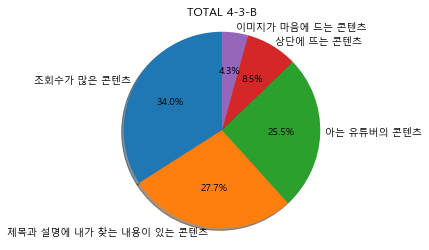

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 4-3-C
유저 수 => 211
답변 수(중복포함) => 211
Top 4 => {'제목과 설명에 내가 찾는 내용이 있는 콘텐츠': '47.9', '상단에 뜨는 콘텐츠': '23.7', '이미지가 마음에 드는 콘텐츠': '20.9', '영상 콘텐츠': '7.6'}


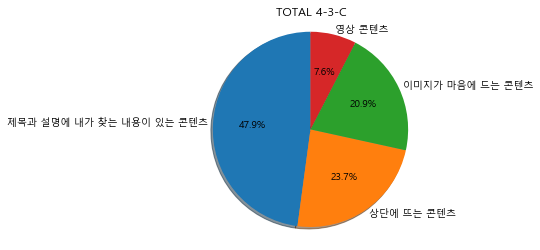

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 4-3-D
유저 수 => 191
답변 수(중복포함) => 191
Top 5 => {'사용자 리뷰': '53.9', '성분': '15.2', '평점': '12.6', '랭킹': '11.0', '제품 정보': '7.3'}


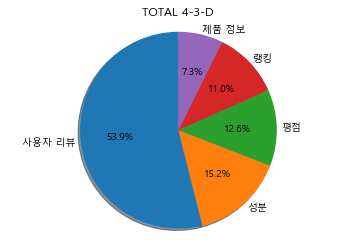

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 4-3-E
유저 수 => 72
답변 수(중복포함) => 72
Top 3 => {'사용자 리뷰': '80.6', '제품 정보': '16.7', '기타': '2.8'}


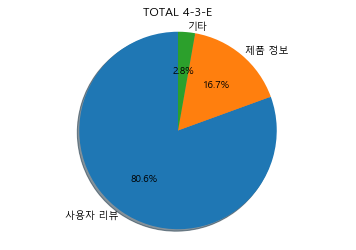

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 4-3-F
유저 수 => 119
답변 수(중복포함) => 119
Top 2 => {'사용자 리뷰': '75.6', '제품 정보': '24.4'}


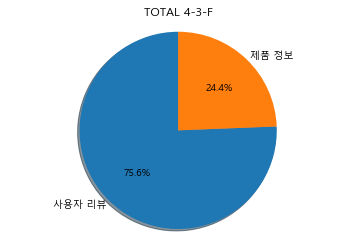

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 4-3-G
유저 수 => 24
답변 수(중복포함) => 24
Top 5 => {'11번가': '4.2', 'happy': '4.2', '가장 신뢰할만함. 포털타이트나 인터넷카페,인스타 등은 돈받고 허위로 쓰는 사람이 많음': '4.2', '검색은 네이버가 상세한것 같아서요\\n저는 무조건 네이버입니다': '4.2', '국민의 방송': '4.2'}


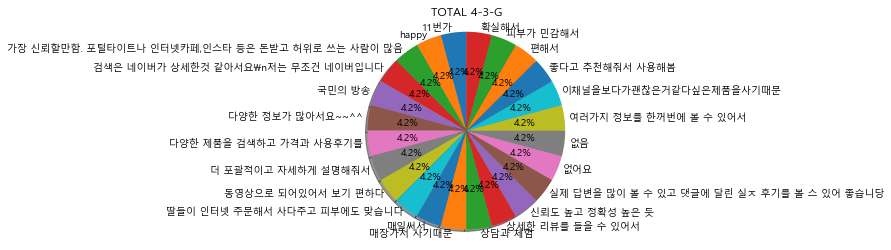

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 5-1-0
유저 수 => 897
답변 수(중복포함) => 897
Top 5 => {'포털사이트': '28.9', 'SNS': '27.1', '화장품 리뷰 앱': '16.4', '쇼핑몰 후기': '10.5', '비디오 플랫폼': '7.7'}


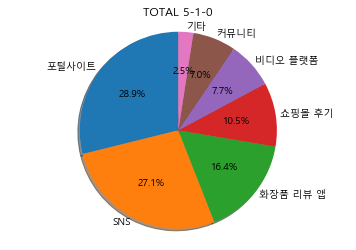

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 5-2-A
유저 수 => 259
답변 수(중복포함) => 259
Top 4 => {'네이버': '88.0', '다음': '6.9', '구글': '3.1', '기타': '1.9'}


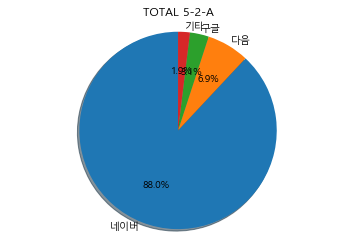

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 5-2-B
유저 수 => 69
답변 수(중복포함) => 69
Top 3 => {'유튜브': '79.7', '네이버 TV': '17.4', '카카오 TV': '2.9'}


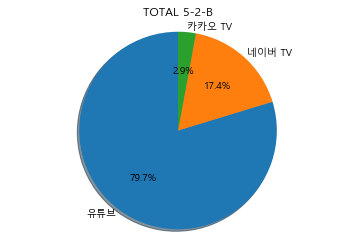

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 5-2-C
유저 수 => 243
답변 수(중복포함) => 243
Top 5 => {'인스타그램': '50.6', '블로그': '26.7', '페이스북': '19.3', '트위터': '2.1', '기타': '1.2'}


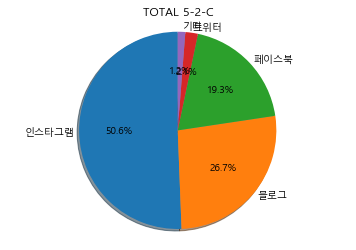

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 5-2-D
유저 수 => 147
답변 수(중복포함) => 147
Top 5 => {'화해': '51.0', '파우더룸': '22.4', '글로우픽': '12.2', '언니의파우치': '9.5', '코스미': '2.7'}


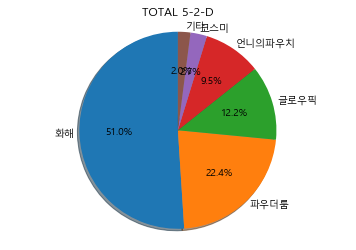

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 5-2-E
유저 수 => 63
답변 수(중복포함) => 63
Top 5 => {'파우더룸': '20.6', '네이트 판': '15.9', '여성시대': '15.9', '인스티즈': '12.7', '기타': '9.5'}


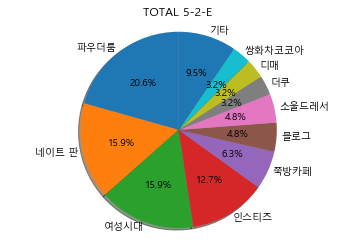

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 5-2-F
유저 수 => 94
답변 수(중복포함) => 94
Top 5 => {'네이버 쇼핑': '33.0', '오픈마켓(G마켓': '16.0', '브랜드 공식 홈페이지': '12.8', '11번가': '11.7', '종합 쇼핑몰(신세계몰': '11.7'}


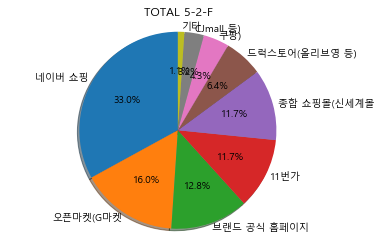

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 5-2-G
유저 수 => 22
답변 수(중복포함) => 22
Top 5 => {'유투브': '9.1', 'Sns': '4.5', 'kbs': '4.5', '남자라 잘;;;': '4.5', '네이버 블로그, 트위터, 직접 찾아감': '4.5'}


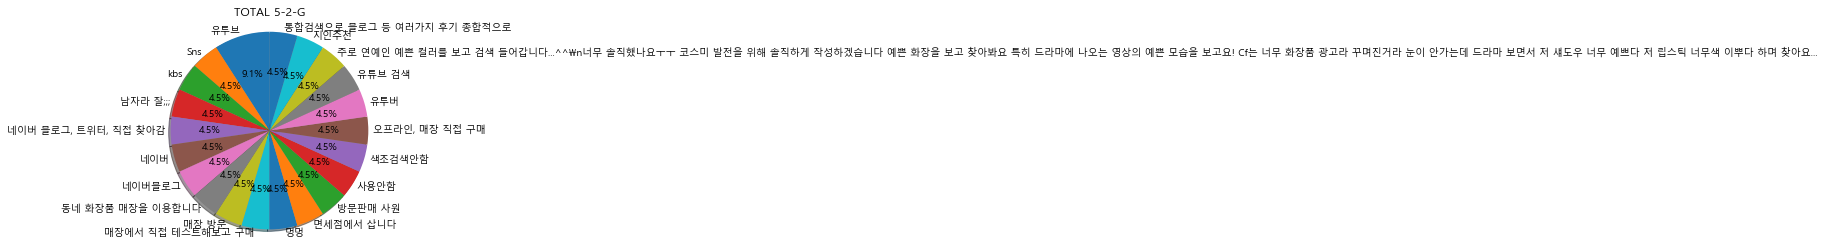

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 5-3-A
유저 수 => 259
답변 수(중복포함) => 259
Top 5 => {'블로그/카페 후기': '68.7', '공식 홈페이지': '18.9', '이미지': '6.6', '쇼핑몰': '4.2', '기타': '1.5'}


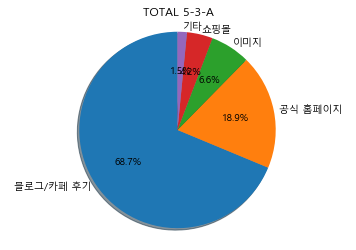

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 5-3-B
유저 수 => 69
답변 수(중복포함) => 69
Top 5 => {'조회수가 많은 콘텐츠': '26.1', '아는 유튜버의 콘텐츠': '23.2', '제목과 설명에 내가 찾는 내용이 있는 콘텐츠': '23.2', '상단에 뜨는 콘텐츠': '18.8', '썸네일이 마음에 드는 콘텐츠': '8.7'}


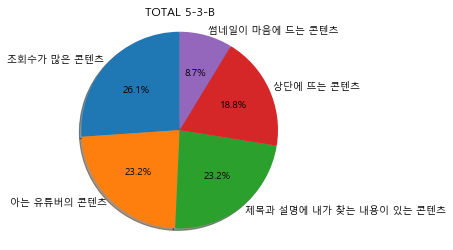

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 5-3-C
유저 수 => 243
답변 수(중복포함) => 243
Top 4 => {'제목과 설명에 내가 찾는 내용이 있는 콘텐츠': '45.3', '이미지가 마음에 드는 콘텐츠': '27.2', '상단에 뜨는 콘텐츠': '19.3', '영상 콘텐츠': '8.2'}


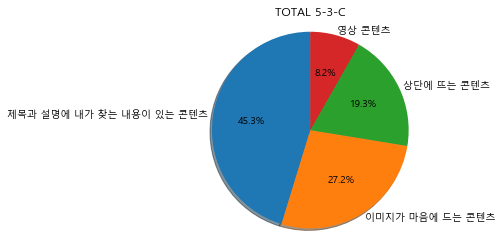

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 5-3-D
유저 수 => 147
답변 수(중복포함) => 147
Top 5 => {'사용자 리뷰': '60.5', '평점': '10.9', '성분': '10.2', '랭킹': '9.5', '제품 정보': '8.2'}


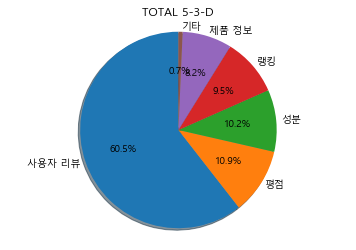

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 5-3-E
유저 수 => 63
답변 수(중복포함) => 63
Top 2 => {'사용자 리뷰': '85.7', '제품 정보': '14.3'}


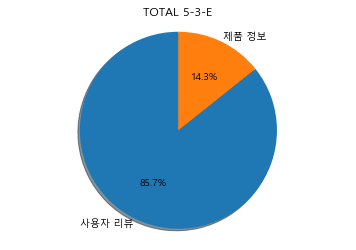

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 5-3-F
유저 수 => 94
답변 수(중복포함) => 94
Top 2 => {'사용자 리뷰': '73.4', '제품 정보': '26.6'}


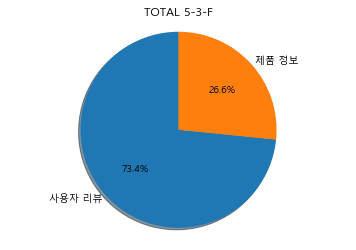

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 5-3-G
유저 수 => 22
답변 수(중복포함) => 22
Top 5 => {'Heathy': '4.5', '가장 검색하기 쉬운경로': '4.5', '가장 후회가 없고 나한테 잘맞는걸 고를수있음': '4.5', '국민바앙송~.~': '4.5', '높은 신뢰도': '4.5'}


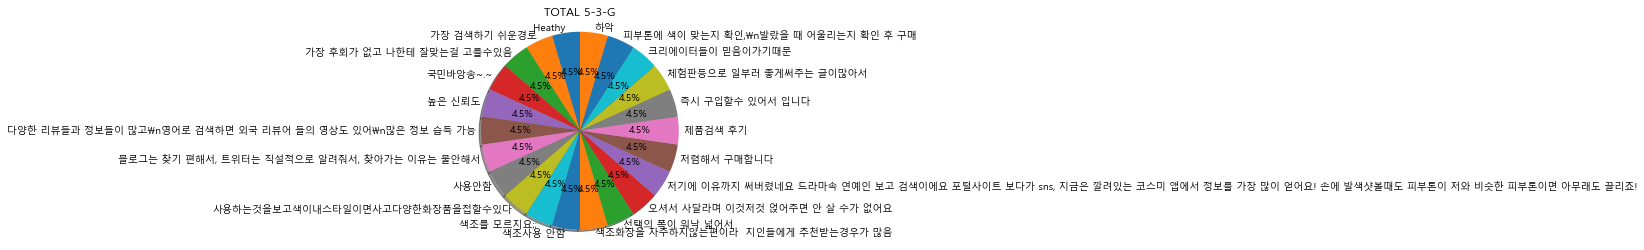

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 7-1-0
유저 수 => 779
답변 수(중복포함) => 2061
Top 5 => {'효과': '27.8', '가격': '23.6', '성분': '19.5', '제품 후기': '14.7', '브랜드': '8.4'}


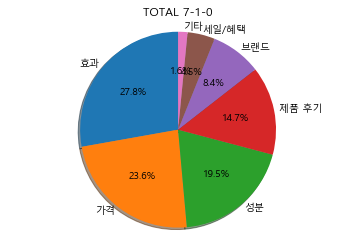

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 7-2-0
유저 수 => 779
답변 수(중복포함) => 2025
Top 2 => {'기타': '97.6', '"': '2.4'}


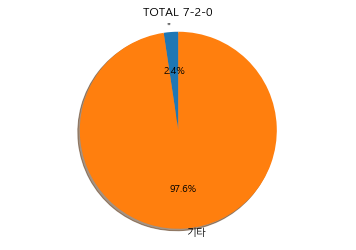

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 7-3-0
유저 수 => 779
답변 수(중복포함) => 779
Top 5 => {'10,000~30,000원': '49.4', '30,000~50,000원': '26.3', '50,000~80,000원': '11.8', '80,000원 이상': '6.7', '10,000원 이하': '5.8'}


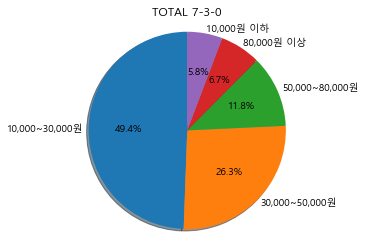

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 8-1-0
유저 수 => 730
답변 수(중복포함) => 1894
Top 5 => {'발색': '25.6', '가격': '24.1', '지속력': '23.2', '브랜드': '11.4', '제품 후기': '11.4'}


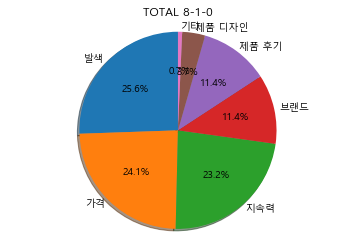

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 8-2-0
유저 수 => 730
답변 수(중복포함) => 1809
Top 3 => {'기타': '90.6', '없음': '7.0', '맥': '2.4'}


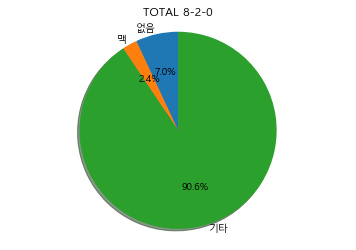

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK => 8-3-0
유저 수 => 730
답변 수(중복포함) => 730
Top 5 => {'10,000~30,000원': '41.5', '30,000~50,000원': '26.2', '10,000원 이하': '21.6', '50,000~80,000원': '7.9', '80,000원 이상': '2.7'}


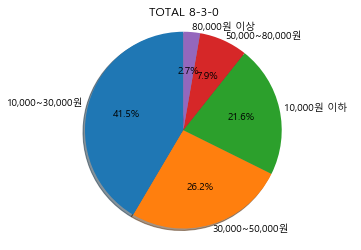

In [181]:
# %%capture cap --no-stderr
result_brand(total_tag, 'total',topN=8)

In [31]:
with open(dir_output+'summary_total.txt', 'w') as out: out.write(cap.stdout)

### 미샤 태그 사용 유저

In [32]:
missha = getTagSummary(postUserSurvey,'미샤')

C:\Users\dongm\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:107: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)
C:\Users\dongm\Anaconda3\lib\site-packages\pandas\core\frame.py:7397: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  index = _union_indexes(indexes)
C:\Users\dongm\Anaconda3\lib\site-packages\pandas\core\frame.py:7397: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  index = _union_indexes(indexes)


In [33]:
%%capture cap --no-stderr
result_brand(missha, '미샤')

In [34]:
with open(dir_output+'summary_missha.txt', 'w') as out: out.write(cap.stdout)

### 이니스프리 태그 사용 유저

In [35]:
innisfree = getTagSummary(postUserSurvey,'이니스프리')

C:\Users\dongm\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:107: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)
C:\Users\dongm\Anaconda3\lib\site-packages\pandas\core\frame.py:7397: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  index = _union_indexes(indexes)
C:\Users\dongm\Anaconda3\lib\site-packages\pandas\core\frame.py:7397: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  index = _union_indexes(indexes)


In [36]:
%%capture cap --no-stderr
result_brand(innisfree, '이니스프리')

In [37]:
with open(dir_output+'summary_innisfree.txt', 'w') as out: out.write(cap.stdout)

In [41]:
yeodrm = getTagSummary(postUserSurvey,'남자')

C:\Users\dongm\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:107: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)
C:\Users\dongm\Anaconda3\lib\site-packages\pandas\core\frame.py:7397: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  index = _union_indexes(indexes)
C:\Users\dongm\Anaconda3\lib\site-packages\pandas\core\frame.py:7397: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  index = _union_indexes(indexes)


In [42]:
%%capture cap --no-stderr
result_brand(yeodrm, '남자')

In [43]:
with open(dir_output+'summary_남자.txt', 'w') as out: out.write(cap.stdout)